Visualizing Jigsaw Puzzle Results -- Cropped

In [24]:
import pandas as pd
import os

# Load the CSV file
csv_path = "/cluster/home/muhamhz/JPDVT/image_model/logs/cropped_images/inference_progress.csv"

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(f"Successfully loaded CSV with {len(df)} rows")
    print("\nFirst few rows:")
    print(df.head())
    print("\nColumn names:")
    print(df.columns.tolist())
else:
    print(f"CSV file not found at: {csv_path}")

Successfully loaded CSV with 206 rows

First few rows:
                  filename  puzzle_correct  patch_matches  time_s
0  img_002_(a)_img_002.png               0              1   12.39
1  img_002_(b)_img_002.png               0              1    4.93
2  img_002_(c)_img_002.png               0              5    4.98
3  img_002_(d)_img_002.png               0              0    4.79
4  img_002_(e)_img_002.png               0              3    3.75

Column names:
['filename', 'puzzle_correct', 'patch_matches', 'time_s']


In [25]:
# Calculate patch accuracy as percentage
df['patch_accuracy'] = df['patch_matches'] / 9.0  # Assuming 3x3 grid (9 patches)

# Statistics
print(f"=== Cropped Images Statistics ===")
print(f"Total images: {len(df)}")

# Perfect puzzles
perfect = df[df['puzzle_correct'] == 1]
print(f"Perfect puzzles: {len(perfect)} ({len(perfect)/len(df)*100:.1f}%)")

# High accuracy results
thresholds = [0.7, 0.8, 0.9]
for t in thresholds:
    high_acc = df[df['patch_accuracy'] >= t]
    print(f"Patch accuracy ≥ {t*100:.0f}%: {len(high_acc)} ({len(high_acc)/len(df)*100:.1f}%)")

# Average statistics
avg_patch_acc = df['patch_accuracy'].mean()
avg_time = df['time_s'].mean()
print(f"\nAverage patch accuracy: {avg_patch_acc:.3f}")
print(f"Average processing time: {avg_time:.2f}s")

# Show the highest accuracy results
print("\nTop 10 highest patch accuracies:")
top_results = df.sort_values(['patch_accuracy', 'puzzle_correct'], ascending=[False, False]).head(10)
print(top_results[['filename', 'puzzle_correct', 'patch_accuracy', 'patch_matches']])

=== Cropped Images Statistics ===
Total images: 206
Perfect puzzles: 21 (10.2%)
Patch accuracy ≥ 70%: 31 (15.0%)
Patch accuracy ≥ 80%: 21 (10.2%)
Patch accuracy ≥ 90%: 21 (10.2%)

Average patch accuracy: 0.332
Average processing time: 3.93s

Top 10 highest patch accuracies:
                       filename  puzzle_correct  patch_accuracy  patch_matches
9       img_002_(j)_img_002.png               1             1.0              9
14      img_002_(o)_img_002.png               1             1.0              9
26      img_003_(l)_img_003.png               1             1.0              9
35  img_004_1_(g)_img_004_1.png               1             1.0              9
37  img_004_1_(i)_img_004_1.png               1             1.0              9
43  img_004_2_(f)_img_004_2.png               1             1.0              9
47  img_004_3_(a)_img_004_3.png               1             1.0              9
48  img_004_3_(b)_img_004_3.png               1             1.0              9
52      img_00

Top 5 highest patch accuracies:


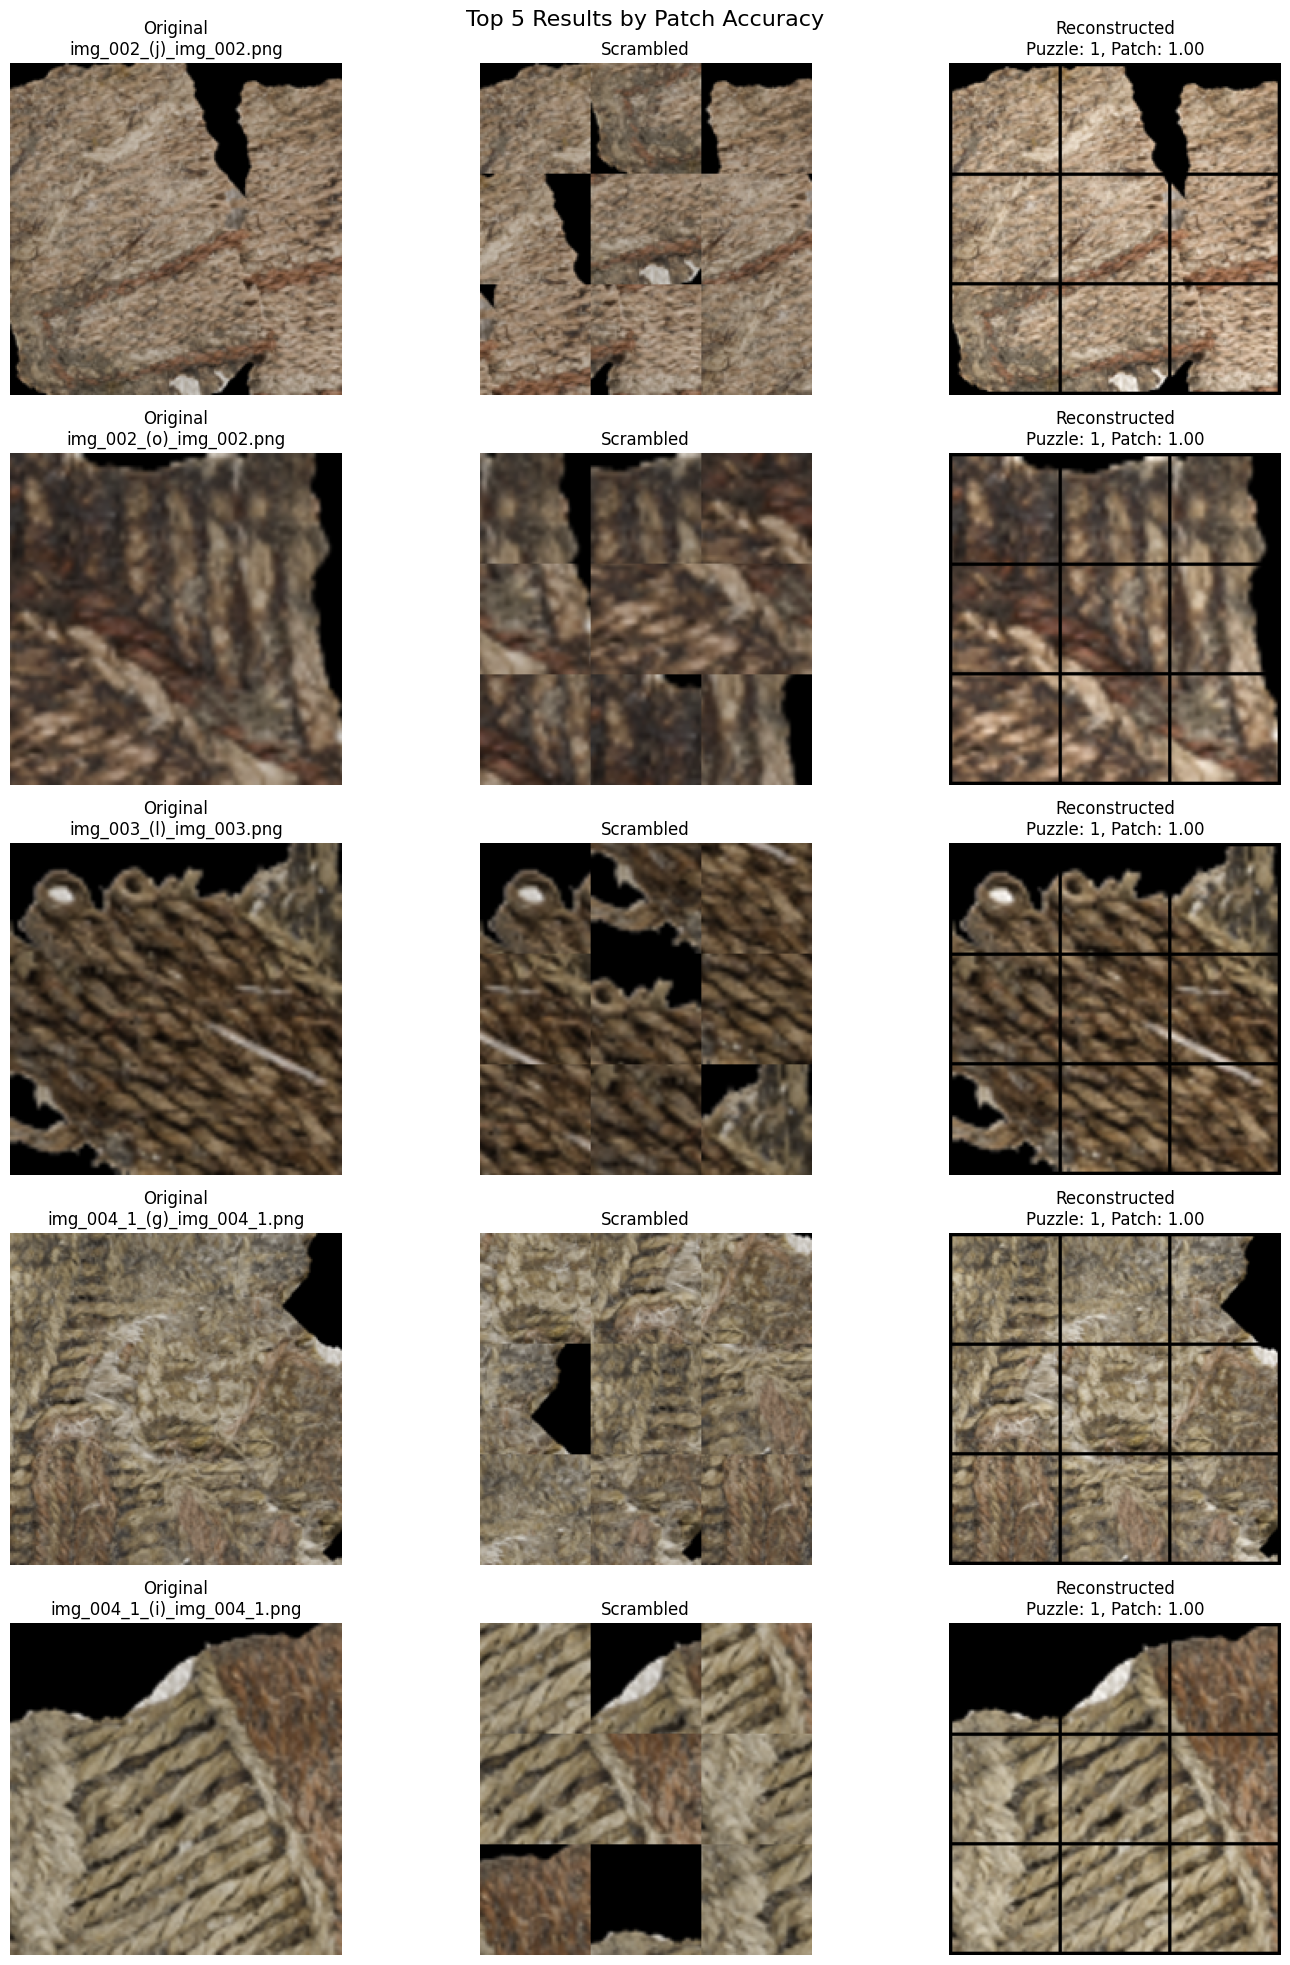

In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Set up matplotlib for inline display
%matplotlib inline

# Base directory for images
base_results_dir = "/cluster/home/muhamhz/JPDVT/image_model/inference/cropped_images_texrec"

def find_image_files(filename, puzzle_correct, patch_acc):
    """Find the three image files for a given result"""
    base_name = os.path.splitext(filename)[0]
    
    # Construct file paths
    original_path = os.path.join(base_results_dir, f"{base_name}_original.png")
    random_path = os.path.join(base_results_dir, f"{base_name}_random.png")
    reconstructed_path = os.path.join(base_results_dir, f"{base_name}_reconstructed_pAcc={puzzle_correct}_patchAcc={patch_acc:.2f}.png")
    
    return original_path, random_path, reconstructed_path

def display_results(df_subset, title="Results"):
    """Display a set of results in a grid"""
    n = len(df_subset)
    if n == 0:
        print("No results to display")
        return
    
    fig, axes = plt.subplots(n, 3, figsize=(15, n*4))
    if n == 1:
        axes = axes.reshape(1, -1)
    
    plt.suptitle(title, fontsize=16, y=0.98)
    
    for i, (idx, row) in enumerate(df_subset.iterrows()):
        filename = row['filename']
        puzzle_correct = row['puzzle_correct']
        patch_acc = row['patch_accuracy']
        
        # Get image paths
        orig_path, random_path, recon_path = find_image_files(filename, puzzle_correct, patch_acc)
        
        # Check if files exist
        if not all(os.path.exists(p) for p in [orig_path, random_path, recon_path]):
            print(f"Warning: Missing files for {filename}")
            continue
        
        # Display images
        axes[i, 0].imshow(Image.open(orig_path))
        axes[i, 0].set_title(f"Original\n{filename}")
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(Image.open(random_path))
        axes[i, 1].set_title("Scrambled")
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(Image.open(recon_path))
        axes[i, 2].set_title(f"Reconstructed\nPuzzle: {puzzle_correct}, Patch: {patch_acc:.2f}")
        axes[i, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display top 5 results
print("Top 5 highest patch accuracies:")
top_5 = df.sort_values(['patch_accuracy', 'puzzle_correct'], ascending=[False, False]).head(5)
display_results(top_5, "Top 5 Results by Patch Accuracy")

Bottom 5 lowest patch accuracies:
                   filename  puzzle_correct  patch_accuracy  patch_matches
3   img_002_(d)_img_002.png               0             0.0              0
7   img_002_(h)_img_002.png               0             0.0              0
12  img_002_(m)_img_002.png               0             0.0              0
16  img_003_(b)_img_003.png               0             0.0              0
23  img_003_(i)_img_003.png               0             0.0              0


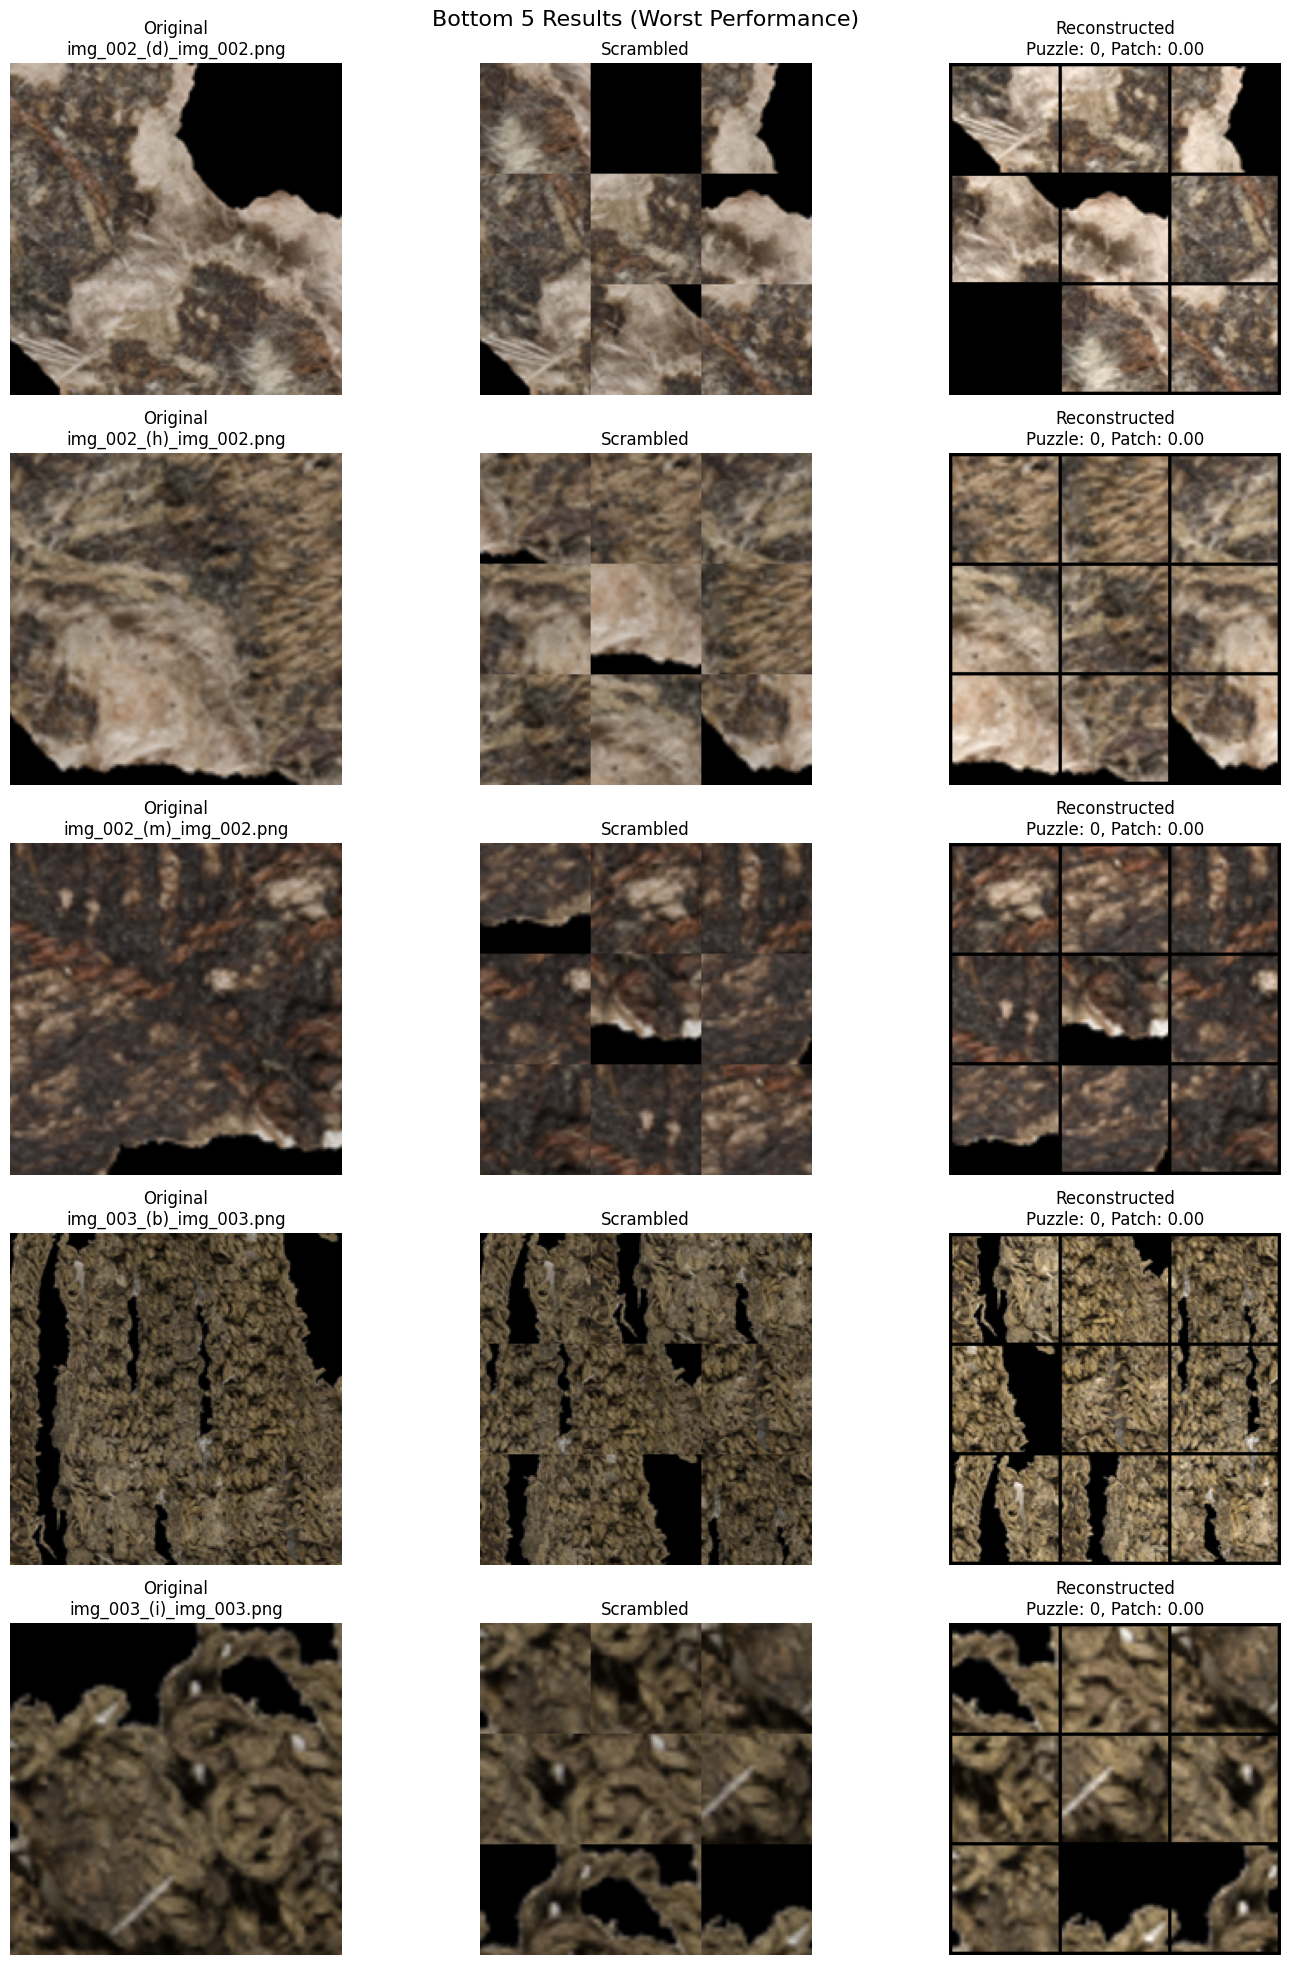

In [27]:
# Display worst 5 results (lowest patch accuracies)
print("Bottom 5 lowest patch accuracies:")
bottom_5 = df.sort_values(['patch_accuracy', 'puzzle_correct'], ascending=[True, True]).head(5)
print(bottom_5[['filename', 'puzzle_correct', 'patch_accuracy', 'patch_matches']])
display_results(bottom_5, "Bottom 5 Results (Worst Performance)")

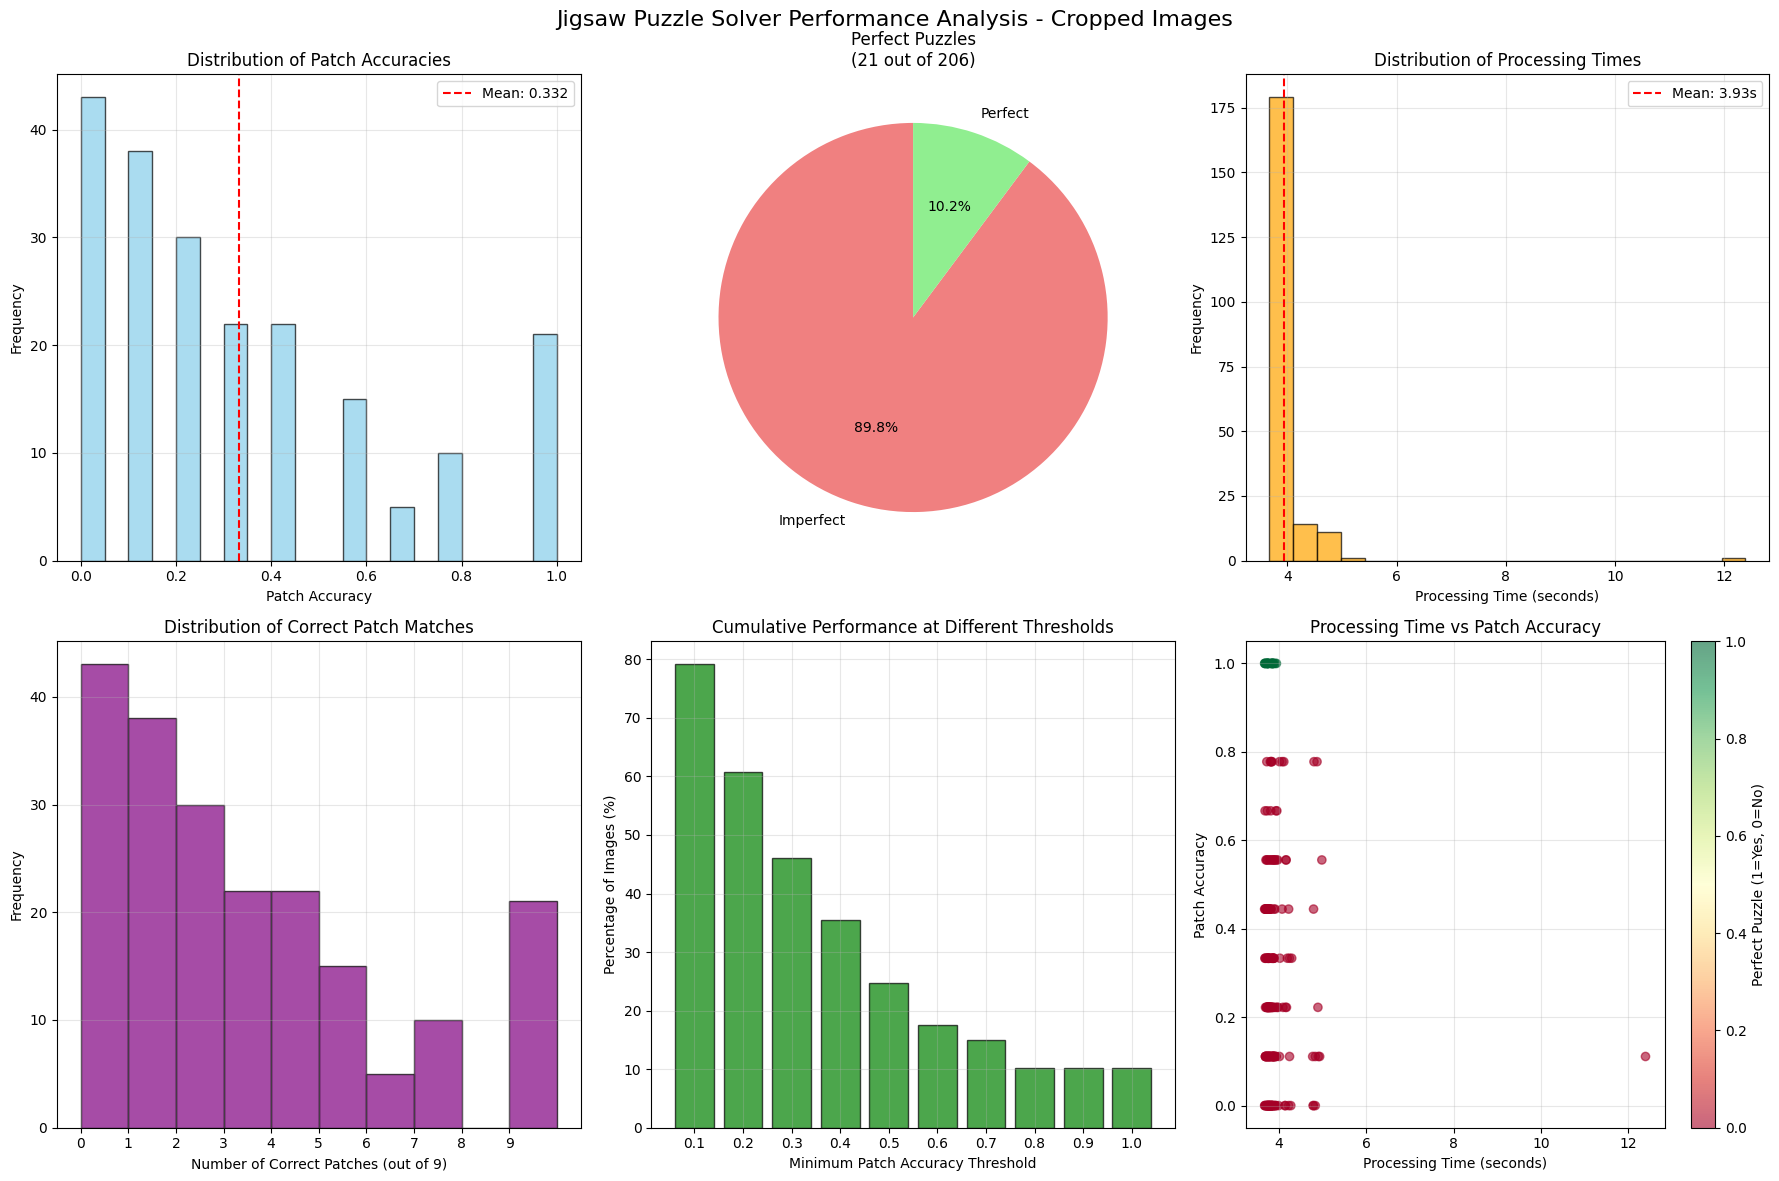


SUMMARY STATISTICS
Total Images Processed: 206
Perfect Puzzles: 21 (10.2%)
Average Patch Accuracy: 0.332 ± 0.312
Average Processing Time: 3.93s ± 0.65s
Best Performance: 1.000
Worst Performance: 0.000
Median Performance: 0.222

Performance Breakdown:
Poor (0.0-0.3): 111 images (53.9%)
Fair (0.3-0.6): 59 images (28.6%)
Good (0.6-0.8): 15 images (7.3%)
Excellent (0.8-1.0): 21 images (10.2%)


In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create a comprehensive dashboard of statistics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Jigsaw Puzzle Solver Performance Analysis - Cropped Images', fontsize=16)

# 1. Patch Accuracy Distribution
axes[0, 0].hist(df['patch_accuracy'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['patch_accuracy'].mean(), color='red', linestyle='--', label=f'Mean: {df["patch_accuracy"].mean():.3f}')
axes[0, 0].set_xlabel('Patch Accuracy')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Patch Accuracies')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Perfect vs Imperfect Puzzles
puzzle_counts = df['puzzle_correct'].value_counts()
axes[0, 1].pie(puzzle_counts.values, labels=['Imperfect', 'Perfect'], autopct='%1.1f%%', 
               colors=['lightcoral', 'lightgreen'], startangle=90)
axes[0, 1].set_title(f'Perfect Puzzles\n({puzzle_counts[1]} out of {len(df)})')

# 3. Processing Time Distribution
axes[0, 2].hist(df['time_s'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].axvline(df['time_s'].mean(), color='red', linestyle='--', label=f'Mean: {df["time_s"].mean():.2f}s')
axes[0, 2].set_xlabel('Processing Time (seconds)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Processing Times')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Patch Matches Distribution
axes[1, 0].hist(df['patch_matches'], bins=range(0, 11), alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].set_xlabel('Number of Correct Patches (out of 9)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Correct Patch Matches')
axes[1, 0].set_xticks(range(0, 10))
axes[1, 0].grid(True, alpha=0.3)

# 5. Performance Thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
counts = [len(df[df['patch_accuracy'] >= t]) for t in thresholds]
percentages = [c/len(df)*100 for c in counts]

axes[1, 1].bar(range(len(thresholds)), percentages, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].set_xlabel('Minimum Patch Accuracy Threshold')
axes[1, 1].set_ylabel('Percentage of Images (%)')
axes[1, 1].set_title('Cumulative Performance at Different Thresholds')
axes[1, 1].set_xticks(range(len(thresholds)))
axes[1, 1].set_xticklabels([f'{t:.1f}' for t in thresholds])
axes[1, 1].grid(True, alpha=0.3)

# 6. Scatter plot: Time vs Accuracy
scatter = axes[1, 2].scatter(df['time_s'], df['patch_accuracy'], 
                            c=df['puzzle_correct'], cmap='RdYlGn', alpha=0.6)
axes[1, 2].set_xlabel('Processing Time (seconds)')
axes[1, 2].set_ylabel('Patch Accuracy')
axes[1, 2].set_title('Processing Time vs Patch Accuracy')
axes[1, 2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 2], label='Perfect Puzzle (1=Yes, 0=No)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Total Images Processed: {len(df)}")
print(f"Perfect Puzzles: {len(perfect)} ({len(perfect)/len(df)*100:.1f}%)")
print(f"Average Patch Accuracy: {df['patch_accuracy'].mean():.3f} ± {df['patch_accuracy'].std():.3f}")
print(f"Average Processing Time: {df['time_s'].mean():.2f}s ± {df['time_s'].std():.2f}s")
print(f"Best Performance: {df['patch_accuracy'].max():.3f}")
print(f"Worst Performance: {df['patch_accuracy'].min():.3f}")
print(f"Median Performance: {df['patch_accuracy'].median():.3f}")

# Performance breakdown by accuracy ranges
print("\nPerformance Breakdown:")
ranges = [(0.0, 0.3, "Poor"), (0.3, 0.6, "Fair"), (0.6, 0.8, "Good"), (0.8, 1.0, "Excellent")]
for low, high, label in ranges:
    count = len(df[(df['patch_accuracy'] >= low) & (df['patch_accuracy'] < high)])
    if label == "Excellent":  # Include 1.0 in excellent
        count = len(df[df['patch_accuracy'] >= low])
    print(f"{label} ({low:.1f}-{high:.1f}): {count} images ({count/len(df)*100:.1f}%)")